In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr
from PIL import Image, ImageTk
from faker import Faker
from transformers import pipeline
from keybert import KeyBERT

In [ ]:
kw_model = KeyBERT(model='all-mpnet-base-v2')

# Basic Dataset erstellen

3 Kategorien: Hotels, Restaurants & Aktivitäten

In [ ]:
df_rest = pd.read_csv('01_Data\dataset_Google-Maps-Reviews-Restaurants_2023-03-26_09-43-08-320.csv')
df_act = pd.read_csv('01_Data\dataset_Google-Maps-Reviews-Activities_2023-03-26_11-08-15-435.csv')
df_hotel = pd.read_csv('01_Data\dataset_Google-Maps-Reviews-Hotels_2023-03-26_11-34-16-492.csv')

print('Restaurants (Shape): ', df_rest.shape)
print('Activities (Shape): ', df_act.shape)
print('Hotels (Shape): ', df_hotel.shape)

In [ ]:
columns_to_keep = [
    "stars",
    "publishedAtDate",
    "name",
    "text",
    "title",
    "subTitle",
    "description",
    "price",
    "totalScore",
    "likesCount",
    "isLocalGuide",
    "reviewId",
    "categoryName",
    "reviewImageUrls/0",
    "reviewImageUrls/1",
    "reviewImageUrls/2",
    "reviewImageUrls/3",
    "reviewImageUrls/4",
    "reviewImageUrls/5",
    "reviewImageUrls/6",
    "reviewImageUrls/7",
    "reviewImageUrls/8",
    "reviewImageUrls/9",
    "reviewUrl",
    "reviewerId",
    "reviewerNumberOfReviews",
    "reviewerPhotoUrl",
    "reviewerUrl",
    "reviewsCount",
    "scrapedAt",
    "state",
    "street",
    "temporarilyClosed",
    "url",
    "website",
    "placeId",
    
    "categories/0",
    "categories/1",
    "categories/2",
    "categoryName"
]

In [ ]:
df_rest = df_rest.dropna(subset=["reviewImageUrls/0"])
df_rest = df_rest[columns_to_keep]
print(df_rest['placeId'].nunique())
df_rest['genre'] = 'restaurant'
print(df_rest.shape)

df_act = df_act.dropna(subset=["reviewImageUrls/0"])
df_act = df_act[columns_to_keep]
print(df_act['placeId'].nunique())
df_act['genre'] = 'activity'
print(df_act.shape)

df_hotel = df_hotel.dropna(subset=["reviewImageUrls/0"])
print(df_hotel['placeId'].nunique())
df_hotel = df_hotel[columns_to_keep]
df_hotel['genre'] = 'hotel'
print(df_hotel.shape)

In [ ]:
df = pd.concat([df_rest, df_act, df_hotel], ignore_index=True)
print(df.shape)
df.to_csv('all_rest_act_hotel.csv', index=False)

In [ ]:
# Nur benötigt um für nachträgliches anhängen der placeId and Schlagwörter und Sentiment Dataframe

# df_raw = pd.read_csv('all_rest_act_hotel.csv')
# df_keywords = pd.read_csv('01_Data/archiv/base_keywords_sentiment_outdated_ohnePlaceId.csv')

# df_keywords['placeId'] = df_keywords['name'].apply(lambda x: df_raw[df_raw['name'] == x]['placeId'].values[0])
# print(df_keywords.shape)

# df_keywords.to_csv('base_keywords_sentiment.csv', index=False)

### Resizing the images to 256-256 pixels via getting the better url & cheaper for Dall-E-API Nutzung

In [ ]:
image_urls_cols = [
    "reviewImageUrls/0",
    "reviewImageUrls/1",
    "reviewImageUrls/2",
    "reviewImageUrls/3",
    "reviewImageUrls/4",
    "reviewImageUrls/5",
    "reviewImageUrls/6",
    "reviewImageUrls/7",
    "reviewImageUrls/8",
    "reviewImageUrls/9"
]

for col in image_urls_cols:
    df[col] = df[col].str.replace("=w150-h150-k-no-p", "=w256-h256-p-k-no")

print(df.shape)

### Extract Keywords With KeyBert

In [ ]:
# df['text'] = df['text'].astype(str)
# print("Convertion done.")

# df['keywords'] = df['text'].apply(lambda x: kw_model.extract_keywords(x,keyphrase_ngram_range=(1,1) ,
#                                      stop_words='english', 
#                                      highlight=False,
#                                      top_n=5))
# print("Keywords extraction done.")
# df.to_csv('base_keywords_sentiment.csv', index=False)


### Sentiment Analyse

In [ ]:
# model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
# sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [ ]:
# df = pd.read_csv('base_keywords_sentiment.csv')
# df['sentiment'] = np.nan
# df['sentiment'] = df['sentiment'].astype(str)
# df['text'] = df['text'].astype(str)
# df['sent_score_0'] = np.nan

# for idx, row in df.iterrows():
#     try: 
#         print("Processing row: ", idx)
#         sentiment = sentiment_task(row['text'])
#         df.at[idx, 'sentiment'] = sentiment
#     except RuntimeError:
#         print("Skipped due to messy data. Row: ", idx)
#         pass
# df.to_csv('base_keywords_sentiment.csv', index=False)

In [ ]:
#only store the keywords in a list not the scores

# df['keywords_only'] = df['keywords'].apply(lambda x: [i[0] for i in x])
# print(df['keywords_only'])
# df.to_csv('base_keywords_sentiment.csv', index=False)

In [ ]:
# df_neu = pd.read_csv('base_keywords_sentiment.csv')
# df_neu['sentiment'] = df_neu['sentiment'].astype(str)
# df_neu.to_csv('base_keywords_sentiment.csv', index=False)

In [ ]:
df['label'] = 'real'
print(df.shape)
df.to_csv('base_keywords_sentiment.csv', index=False)

### Visualiserungen des Basis Datensatzes für Verständnis

In [227]:
df = pd.read_csv('base_keywords_sentiment.csv')
df['reviewImageUrls/9'].nunique()


# print one complete row
df.iloc[0]

stars                                                                    5.0
publishedAtDate                                     2022-03-18T02:09:23.940Z
name                                                             John Yerkes
text                       We’ve loved the Brookside location and were th...
title                                             Plate Restaurant - Leawood
subTitle                                                                 NaN
description                                                              NaN
price                                                                    NaN
totalScore                                                               4.4
likesCount                                                               5.0
isLocalGuide                                                            True
reviewId                                 ChZDSUhNMG9nS0VJQ0FnSURXM043c2FREAE
categoryName                                              Italian restaurant

In [ ]:
image_urls_cols = [
    "reviewImageUrls/0",
    "reviewImageUrls/1",
    "reviewImageUrls/2",
    "reviewImageUrls/3",
    "reviewImageUrls/4",
    "reviewImageUrls/5",
    "reviewImageUrls/6",
    "reviewImageUrls/7",
    "reviewImageUrls/8",
    "reviewImageUrls/9"
]

In [209]:
df = pd.read_csv('base_keywords_sentiment.csv')
df['text'] = df['text'].astype(str)

word_count_avg = df['text'].str.split().apply(len).mean()
print("Average Review Length (Words): ", word_count_avg.round(1))

word_count_tot = df['text'].str.split().apply(len).sum()
print("Total Word Count: " ,  word_count_tot)

Average Review Length (Words):  40.2
Total Word Count:  276351


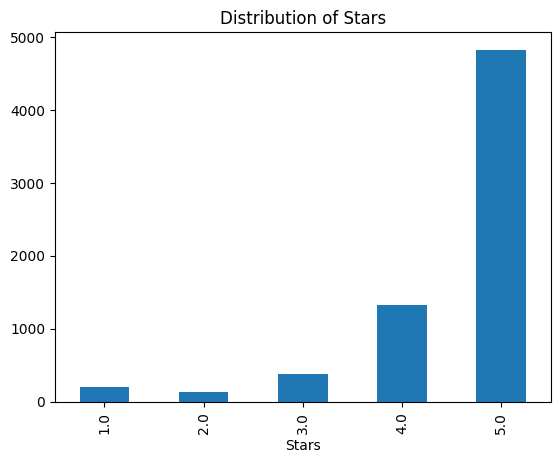

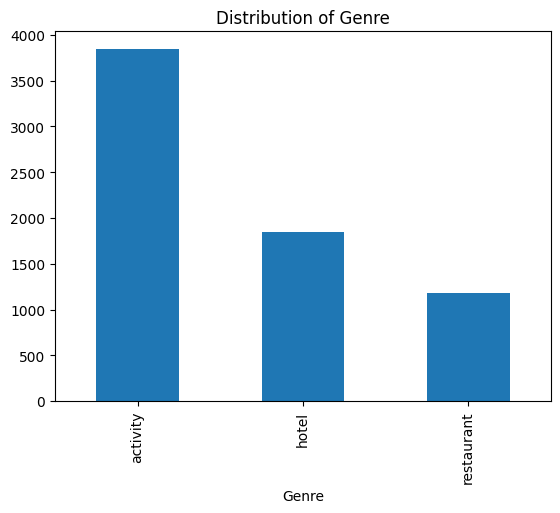

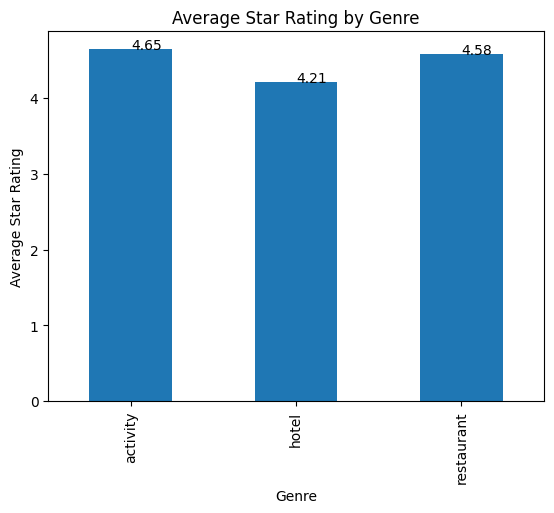

In [195]:
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Stars')
plt.xlabel('Stars')
#plt.savefig('stars_distribution.svg', dpi=300, bbox_inches='tight')
plt.show()

df['genre'].value_counts().plot(kind='bar') 
plt.title('Distribution of Genre')
plt.xlabel('Genre')
#plt.savefig('count_reviews_by_genre.svg')
plt.show()

df.groupby('genre')['stars'].mean().plot(kind='bar')
for i, v in enumerate(df.groupby('genre')['stars'].mean().round(2)):
    plt.text(i, v, str(v), color='black')

plt.title('Average Star Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Star Rating')
# plt.savefig('average_star_rating_by_genre.png')
plt.show()